# HARMONIC BALANCE METHOD

Initially start with linear equation solving using FFT and comparing with the general solution

**$\ddot{x} + x = cos(2t)$**

 message: 'Optimization terminated successfully.'
       x: array([-0.33399111, -0.24765072, -0.03254632,  0.19884773,  0.32566032,
        0.28171368,  0.090065  , -0.14903459, -0.31051256, -0.30977985,
       -0.14694131,  0.09323082,  0.28551165,  0.32957866,  0.2023549 ,
       -0.02992393, -0.24624732])
     nit: 57
     fun: 0.00061673628981899964
    njev: 57
     jac: array([ 50.20082419, -49.72596857,  24.96704244,  14.99586373,
       -19.59926716,   4.82634378,  -0.98889774,   3.21597896,
        -2.61095873,   8.83656553, -27.47077913,  51.4611969 ,
       -47.60202626,  26.80753248,  14.87814988, -11.54410474,
       -26.40722304,   0.        ])
 success: True
    nfev: 1257
  status: 0
[-0.33399111 -0.24765072 -0.03254632  0.19884773  0.32566032  0.28171368
  0.090065   -0.14903459 -0.31051256 -0.30977985 -0.14694131  0.09323082
  0.28551165  0.32957866  0.2023549  -0.02992393 -0.24624732]


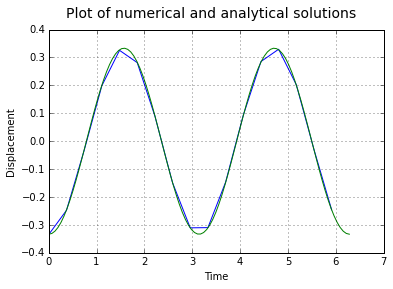

In [13]:
%matplotlib inline
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci

# I am solving the equation dotdotX + X = cos(2*t)


# this is method 1
N = 17
t = np.linspace(0, 2*np.pi, N+1)    # time samples of forcing function
t = t[0:-1]                         # Removing the extra sample
f = np.cos(2*t)                     # My forcing function
F = np.fft.fft(f)
omega = np.fft.fftfreq(N, 1/N) + 0.0000001 # list of frequencies
X = np.divide(F, 1 - omega**2)
x = np.fft.ifft(X)

t_eval = np.linspace(0,2*np.pi,100)
X_analytical = -(np.cos(2*t_eval)/3)

#pl.scatter(t,x)
#pl.show()

# this is the Dr. Slater method, this will work with nonlinear functions
xbar = f*0 + np.cos(2*t)

def FUNCTION(xbar):
    N = len(xbar)
    Xbar = np.fft.fft(xbar)
    omega = np.fft.fftfreq(N, 1/N) + 0.0000001 # list of frequencies
    dotdotxbar = np.fft.ifft(np.multiply((1j*omega)**2,Xbar))
    R = np.sum(np.real(np.abs(dotdotxbar + xbar - f)))
    return R

optimizedResults = sci.minimize(FUNCTION, xbar, method='SLSQP')
xbar = optimizedResults.x

#optimizedResults = sci.fmin(FUNCTION, xbar, args=(), xtol=0.0000001, ftol=0.0000001,maxiter=10000, maxfun= 100000)
#print(optimizedResults)
#xbar = optimizedResults

# func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None


print(optimizedResults)
print(xbar)

# pl.plot(t_eval, X_analytical)
fig = plt.figure()
pl.plot(t,xbar)
pl.plot(t_eval, X_analytical)
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid()
pl.show()

Now non-Linear governing equation 

**$\ddot{x} + \dot{x} + x - (x^3)= cos(2t)$**

 message: 'Optimization terminated successfully.'
       x: array([-0.2269576 , -0.09457638,  0.07464096,  0.21477433,  0.2712435 ,
        0.22206631,  0.08640336, -0.08294603, -0.21998014, -0.27136719,
       -0.21705891, -0.07824011,  0.0910573 ,  0.224883  ,  0.27110127,
        0.21175185,  0.06991033, -0.09916168, -0.22962745, -0.27067243,
       -0.20630755, -0.06161503,  0.10706445,  0.23403439,  0.26983651,
        0.20055443,  0.05313599, -0.11496897, -0.23833719, -0.26888741,
       -0.19474358, -0.04474781,  0.12266197,  0.24230869,  0.26754044,
        0.18856447,  0.03614386, -0.13034627, -0.24606704, -0.2659775 ,
       -0.18229411, -0.02763065,  0.13780366,  0.24956817,  0.26412495,
        0.17580149,  0.01900045, -0.14520008, -0.25284252, -0.26203693,
       -0.16919084, -0.01047116,  0.15231495,  0.25577571,  0.25963789,
        0.16237244,  0.00186643, -0.15938775, -0.25855739, -0.25703624,
       -0.1554077 ,  0.00674356,  0.16624768,  0.26099878,  0.25408775,
    

/Users/soumithvodnala/anaconda/lib/python3.5/site-packages/scipy/optimize/slsqp.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon
/Users/soumithvodnala/anaconda/lib/python3.5/site-packages/scipy/optimize/slsqp.py:406: ComplexWarning: Casting complex values to real discards the imaginary part
  slsqp(m, meq, x, xl, xu, fx, c, g, a, acc, majiter, mode, w, jw)


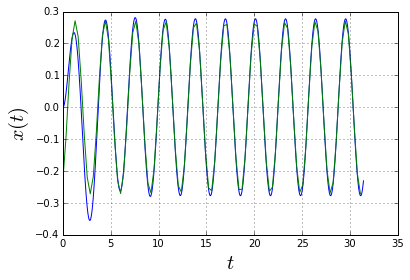

In [30]:
%matplotlib inline
import pylab as pl
import numpy as np
import scipy.optimize as sci
import scipy.integrate as sp

# this code is the nonlinear case of \dotdot{x} + \dot{x} + x - x**3 = cos(2*t)

# Plotting some solutions
def solve_hw2(max_time=5,x0 = 1, v0 = 1):
    def hw2_deriv(x1_x2,t):
        x1, x2 = x1_x2
        return [x2, -x2-x1+0*x1**3+np.cos(2*t)]
    t = np.linspace(0, max_time, int(2000*max_time))
    x_t = sp.odeint(hw2_deriv, [x0,v0], t)
    return t, x_t

t, x_t = solve_hw2(max_time=10*np.pi, x0 = 0, v0 = 0)

pl.plot(t,x_t[:,0])
pl.xlabel('$t$', fontsize=20)
pl.ylabel('$x(t)$', fontsize=20)
pl.grid()

# this is method 1
N = 99
t = np.linspace(0, 10*np.pi, N+1)    # time samples of forcing function
t = t[0:-1]                         # Removing the extra sample
f = np.cos(2*t)                     # My forcing function
T = t[-1]

# this is the Dr. Slater method, this will work with nonlinear functions
xbar = 10*f

def FUNCTION(xbar):
    N = len(xbar)
    Xbar = np.fft.fft(xbar)
    omega = np.fft.fftfreq(N, T/(2*np.pi*N) )# + 0.0000001 # list of frequencies
    dotxbar = np.fft.ifft(np.multiply((1j*omega),Xbar))
    dotdotxbar = np.fft.ifft(np.multiply((1j*omega)**2,Xbar))
    R = dotdotxbar + dotxbar + xbar - 0*xbar**3 - f
    R = R**2
    R = np.sum(R)
    return R

optimizedResults = sci.minimize(FUNCTION, xbar, method='SLSQP')
xbar = optimizedResults.x

print(optimizedResults)
print(xbar)

pl.plot(t,xbar)
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
pl.show()

linear equation with damping

**$\ddot{x} + \dot{x} + x = cos(2t)$**

 message: 'Optimization terminated successfully.'
       x: array([-0.23078748, -0.17195167, -0.09628588, -0.01119672,  0.07498669,
        0.15382806,  0.2176098 ,  0.26008859,  0.27710652,  0.26699757,
        0.2307509 ,  0.17191524,  0.09624947,  0.01116024, -0.07502299,
       -0.15386426, -0.21764609, -0.26012496, -0.27714288, -0.26703389,
       -0.23078764, -0.17195183, -0.09628583, -0.01119651,  0.07498662,
        0.15382803,  0.21760979,  0.26008849,  0.2771066 ,  0.26699761,
        0.23075103,  0.17191536,  0.09624953,  0.0111603 , -0.07502303,
       -0.15386438, -0.21764624, -0.26012494, -0.27714293, -0.26703393])
     nit: 2
     fun: (1.870940816986629e-08+8.579837955882194e-11j)
    njev: 2
     jac: array([-0.00098101, -0.00347981,  0.01079302, -0.01592444,  0.02098032,
       -0.02296801,  0.02703271, -0.0265175 ,  0.02122016, -0.01329544,
        0.01481399, -0.02200066,  0.03179598, -0.03448112,  0.03185778,
       -0.02466498,  0.01964074, -0.01324119,  0.0090657

/Users/soumithvodnala/anaconda/lib/python3.5/site-packages/scipy/optimize/slsqp.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon
/Users/soumithvodnala/anaconda/lib/python3.5/site-packages/scipy/optimize/slsqp.py:406: ComplexWarning: Casting complex values to real discards the imaginary part
  slsqp(m, meq, x, xl, xu, fx, c, g, a, acc, majiter, mode, w, jw)


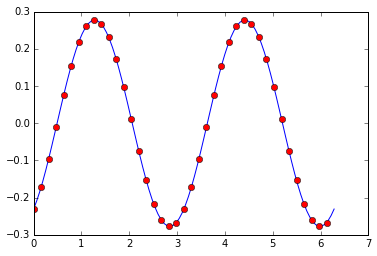

In [50]:
%matplotlib inline
import pylab as pl
import numpy as np
import scipy.optimize as sci

# This equation has a damped term
# I am solving the equation dotdotX + dotX + X = cos(2*t)

# this is method 1
N = 40
t = np.linspace(0, 2*np.pi, N+1)    # time samples of forcing function
t = t[0:-1]                         # Removing the extra sample
f = np.cos(2*t)                     # My forcing function

t_eval = np.linspace(0,2*np.pi,100)
X_analytical = (2/13)*np.sin(2*t_eval) - (3/13)*np.cos(2*t_eval)

# this is the Dr. Slater method, this will work with nonlinear functions
xbar = f

def FUNCTION(xbar):
    N = len(xbar)
    Xbar = np.fft.fft(xbar)
    omega = np.fft.fftfreq(N, 1/N) + 0.0000001 # list of frequencies
    dotxbar = np.fft.ifft(np.multiply((1j*omega),Xbar))
    dotdotxbar = np.fft.ifft(np.multiply((1j*omega)**2,Xbar))
    R = dotdotxbar + dotxbar + xbar - f
    R = R**2
    R = np.sum(R)
    return R

optimizedResults = sci.minimize(FUNCTION, xbar, method='SLSQP')
xbar = optimizedResults.x

print(optimizedResults)
print(xbar)
pl.plot(t_eval, X_analytical)
pl.plot(t,xbar,'ro')
pl.show()

The Duffing oscillator  

**$\ddot{x} + \dot{x} + x + sin(x)= Acos(2t)$**

In [2]:
%matplotlib inline
#From nonlinear.py posted by Daniel Clark
import pylab as pl
import numpy as np
import scipy.optimize as sci
import scipy.integrate as sp

# this code is the nonlinear case of \dotdot{x} + \dot{x} + sin(x) = A*cos(w*t)

def DuffingOscillatorTimeSeriesResults(N = 3,w = 2,A = 1.2):
    t = np.linspace(0, 10*np.pi, N+1)    # time samples of forcing function
    t = t[0:-1]                         # Removing the extra sample
    f = A*np.cos(w*t)                     # My forcing function
    T = t[-1]
    xbar = 10*f

    def FUNCTION(xbar):
        N = len(xbar)
        Xbar = np.fft.fft(xbar)
        omega = np.fft.fftfreq(N, T/(2*np.pi*N) )# + 0.0000001 # list of frequencies
        dotxbar = np.fft.ifft(np.multiply((1j*omega),Xbar))
        dotdotxbar = np.fft.ifft(np.multiply((1j*omega)**2,Xbar))
        R = dotdotxbar + dotxbar + xbar + xbar**3 - f
        R = R**2
        R = np.sum(R)
        return R

    optimizedResults = sci.minimize(FUNCTION, xbar, method='SLSQP')
    xbar = optimizedResults.x

    print(optimizedResults)
    print(xbar)

    pl.plot(t,xbar,t,f)
    pl.legend(['x','Forcing Function'])
    pl.xlabel('Time (s)')
    pl.show()

 message: 'Iteration limit exceeded'
       x: array([ 1.93231467,  2.761191  ,  6.56007893, -5.69931079, -6.18589595,
        6.39014429, -2.43811206, -6.79780479,  6.4360562 ,  1.04942178,
       -4.97578723,  2.27259475,  6.78116385, -6.3970828 , -2.53759707,
        4.38919529, -1.49647857, -6.49488355,  6.51123622,  2.85800151,
       -1.84717195,  2.6175274 ,  6.31776043, -6.35084087, -0.20977508,
        5.58697419, -3.56354495, -6.21113358,  6.06015409,  3.52638829,
       -0.01560659,  3.06725075,  6.14298348, -5.71493984, -3.72465619,
       -0.92800328, -3.66997754, -4.57900394,  1.67260324,  5.08275259,
       -0.16495957,  2.67374523,  6.6608363 , -6.45740315, -3.24554895,
       -0.449441  , -2.66062281, -5.02471201,  1.43495415,  4.62968953,
        1.8734431 ,  3.83741209,  5.45473806, -4.57953635, -4.61033393,
        0.05355531, -2.70677313, -6.34262689,  5.95604728,  3.82770711,
       -1.18260163,  2.55618692,  6.84805821, -6.61914357, -0.92439409,
        5.3306917

/Users/soumithvodnala/anaconda/lib/python3.5/site-packages/scipy/optimize/slsqp.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon
/Users/soumithvodnala/anaconda/lib/python3.5/site-packages/scipy/optimize/slsqp.py:406: ComplexWarning: Casting complex values to real discards the imaginary part
  slsqp(m, meq, x, xl, xu, fx, c, g, a, acc, majiter, mode, w, jw)


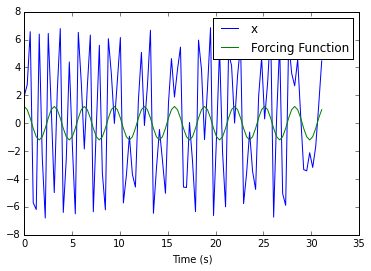

In [55]:
DuffingOscillatorTimeSeriesResults(N = 100)

In [56]:
#import numpy as np
import scipy as sp
import scipy.integrate
import matplotlib.pyplot as plt

# More plotting stuff
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

# Needed for sliders that I use. 
import IPython.core.display as ipcd
from ipywidgets.widgets.interaction import interact, interactive

# These make vector graphics... higher quaility. If it doesn't work, comment these and try the preceeding. 

In [57]:
import numpy as np
import pylab as pl
def solve_sdof(max_time=10.0, g = 9.81,l = 1,m = 1,zeta = 0.1, A = 3.78, w = 2, x0 = 0, v0 = 0, plotnow = 1):

    
    def sdof_deriv(x1_x2, t, g = 9.81,l = 1,m = 1,zeta = 0.1,A = 3.78, w = 2):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, -zeta/m/l*x2 - g/l*np.sin(x1) + A*np.cos(w*t)]

    x0i=((x0, v0))
    # Solve for the trajectories
    t = sp.linspace(0, max_time, int(250*max_time))
    x_t = sp.integrate.odeint(sdof_deriv, x0i, t)
    
    x, v = x_t.T
    f = A*np.cos(w*t)
    
    if plotnow == 1:
        #fig = plt.figure()
        #ax = fig.add_axes([0, 0, 1, 1], projection='3d')
        plt.plot(t,x,t,f,'--')
        pl.legend(['x','Forcing Function'])
        plt.xlabel('Time (s)')
        plt.ylabel('x')
        plt.title('Integrated Response of the Damped, Nonlinear Pendulum')
        plt.show()

    return t, x, v

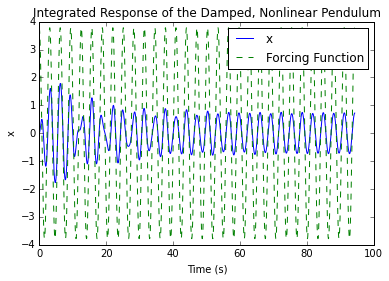

(array([  0.00000000e+00,   4.00033020e-03,   8.00066041e-03, ...,
          9.42397789e+01,   9.42437793e+01,   9.42477796e+01]),
 array([  0.00000000e+00,   3.02402364e-05,   1.20938577e-04, ...,
          7.21703534e-01,   7.21888299e-01,   7.22029750e-01]),
 array([ 0.        ,  0.01511765,  0.03022593, ...,  0.05160135,
         0.04077355,  0.02994625]))

In [58]:
solve_sdof(max_time=3*10*np.pi, x0 = 0, v0 = 0, plotnow = 1)


still working...
